In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mpl_toolkits.mplot3d import axes3d
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from matplotlib import style
import mysql.connector
import requests
from bs4 import BeautifulSoup

Nilai x = 5 
Nilai y = 3 
Nilai z = 7


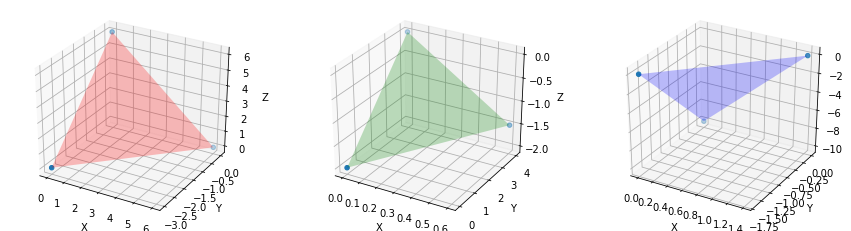

In [2]:
# 03 SOAL 2

# solve & print SPLTV
konstanta = np.array([[1,-2,1],[3,1,-2],[7,-6,-1]])
hasil = np.array([6,4,10])
solusi = np.linalg.solve(konstanta,hasil).astype(int)
print('Nilai x = {} \nNilai y = {} \nNilai z = {}'.format(solusi[0],solusi[1],solusi[2]))


# 3D chart
fig3d = plt.figure('SPLTV', figsize=(15, 4))
fig3d.tight_layout()
ax3d_1 = plt.subplot(131, projection='3d')
ax3d_2 = plt.subplot(132, projection='3d')
ax3d_3 = plt.subplot(133, projection='3d')

# buat poin-poin untuk persamaan x - 2y + z = 6
x1 = np.array([0, 0, 6])
y1 = np.array([-3, 0, 0])
z1 = np.array([0, 6, 0])
ax3d_1.scatter(x1, y1, z1)

# buat poin-poin untuk persamaan 3x + y - 2z = 4
x2 = np.array([0.6, 0, 0])
y2 = np.array([4, 4, 0])
z2 = np.array([-1.5, 0, -2])
ax3d_2.scatter(x2, y2, z2)

# buat poin-poin untuk persamaan 7x - 6y - z = 10
x3 = np.array([0, 0, 1.4])
y3 = np.array([-1.67, 0, 0])
z3 = np.array([0, -10, 0])
ax3d_3.scatter(x3, y3, z3)

coords_1 = [list(zip(x1, y1, z1))]
coords_2 = [list(zip(x2, y2, z2))]
coords_3 = [list(zip(x3, y3, z3))]
surface_1 = Poly3DCollection(coords_1, alpha=.25, facecolor='r')
surface_2 = Poly3DCollection(coords_2, alpha=.25, facecolor='g')
surface_3 = Poly3DCollection(coords_3, alpha=.25, facecolor='b')
ax3d_1.add_collection3d(surface_1)
ax3d_2.add_collection3d(surface_2)
ax3d_3.add_collection3d(surface_3)

ax3d_1.set_xlabel('X')
ax3d_1.set_ylabel('Y')
ax3d_1.set_zlabel('Z')

ax3d_2.set_xlabel('X')
ax3d_2.set_ylabel('Y')
ax3d_2.set_zlabel('Z')

ax3d_3.set_xlabel('X')
ax3d_3.set_ylabel('Y')
ax3d_3.set_zlabel('Z')
plt.show()

In [3]:
# 03 SOAL 4
dfBcg = pd.read_csv('imunisasiBcg95-17.csv', index_col=0, na_values='n.a')
dfCampak = pd.read_csv('imunisasiCampak95-17.csv', index_col=0, na_values='n.a')
dfDpt = pd.read_csv('imunisasiDpt95-17.csv', index_col=0, na_values='n.a')
dfPolio = pd.read_csv('imunisasiPolio95-17.csv', index_col=0, na_values='n.a')

# rename kolom agar nama lebih simpel
dfBcg = dfBcg.rename(columns={'% Balita yang pernah mendapat imunisasi BCG':'%_imunisasi_BCG'})
dfCampak = dfCampak.rename(columns={'% Balita yang pernah mendapat imunisasi Campak':'%_imunisasi_campak'})
dfDpt = dfDpt.rename(columns={'% Balita yang pernah mendapat imunisasi DPT':'%_imunisasi_DPT'})
dfPolio = dfPolio.rename(columns={'% Balita yang pernah mendapat imunisasi Polio':'%_imunisasi_polio'})

# interpolasi kolom persentase
dfBcg = dfBcg.interpolate(axis=0)
dfCampak = dfCampak.interpolate(axis=0)
dfDpt = dfDpt.interpolate(axis=0)
dfPolio = dfPolio.interpolate(axis=0)

# buat figur persentase balita yang sudah diimunisasi
fig1, ax1 = plt.subplots(2, 2, figsize=(11,6))
fig1.tight_layout()
fig1.subplots_adjust(hspace=0.4)
ax1[0,0].bar(dfBcg.index, dfBcg['%_imunisasi_BCG'], color='r')
ax1[0,0].set_title('BCG', size=10)
ax1[0,1].bar(dfCampak.index, dfCampak['%_imunisasi_campak'], color='g')
ax1[0,1].set_yticks(np.arange(0,81,10))
ax1[0,1].set_title('Campak', size=10)
ax1[1,0].bar(dfDpt.index, dfDpt['%_imunisasi_DPT'], color='y')
ax1[1,0].set_title('DPT', size=10)
ax1[1,1].bar(dfPolio.index, dfPolio['%_imunisasi_polio'], color='b')
ax1[1,1].set_title('Polio', size=10)

for (row, col), subplot in np.ndenumerate(ax1) :  # set x tick biar gak usah satu-satu
    subplot.set_xticks(dfBcg.index)
    subplot.set_xticklabels(dfBcg.index, rotation=90)
    
# buat figur persentasi balita yang belum diimunisasi
fig2, ax2 = plt.subplots(2, 2, figsize=(11,6))
fig2.tight_layout()
fig2.subplots_adjust(hspace=0.4)
ax2[0,0].bar(dfBcg.index, 100 - dfBcg['%_imunisasi_BCG'], color='r')
ax2[0,0].set_title('BCG', size=10)
ax2[0,1].bar(dfCampak.index, 100 - dfCampak['%_imunisasi_campak'], color='g')
ax2[0,1].set_title('Campak', size=10)
ax2[1,0].bar(dfDpt.index, 100 - dfDpt['%_imunisasi_DPT'], color='y')
ax2[1,0].set_title('DPT', size=10)
ax2[1,1].bar(dfPolio.index, 100 - dfPolio['%_imunisasi_polio'], color='b')
ax2[1,1].set_title('Polio', size=10)

for (row, col), subplot in np.ndenumerate(ax2) :  # set x tick biar gak usah satu-satu
    subplot.set_xticks(dfBcg.index)
    subplot.set_xticklabels(dfBcg.index, rotation=90)

FileNotFoundError: [Errno 2] File imunisasiBcg95-17.csv does not exist: 'imunisasiBcg95-17.csv'

In [ ]:
# 04 SOAL 2

database = mysql.connector.connect(host = 'localhost',
                                  port = 3306,
                                  user = 'Luthfiaed',
                                  passwd = 'Lupicemput29GC',
                                  database = 'world')
query = '''
select name, population from country
where region = 'southeast asia';
'''
df = pd.read_sql(query,database)
df = df.sort_values(by='name')
plt.style.use('seaborn')
plt.figure(figsize=(12,7))
plt.bar(df['name'], df['population'], color=['b','orange','g','r','purple','brown','pink','grey','chartreuse','aqua','blue'], width=0.7)
plt.xticks(rotation=45)
plt.title('Populasi Negara ASEAN', size=15)
plt.xlabel('Negara', c='k')
plt.ylabel('Populasi (x100jt jiwa)', c='k')
for x, y in enumerate(df['population']) :
    plt.text(x - 0.5, y + 3000000, str(y),size=12)
plt.show()

pie, label, pct = plt.pie(df['population'], labels=df['name'], autopct=lambda z:'{:.1f}%'.format(z))
color = ['b','orange','g','r','purple','brown','pink','grey','chartreuse','aqua','blue']
for text in pct :
    text.set_color('white')
i = 0
for item in pie :
    item.set_color(color[i])
    i += 1
plt.title('Persentase Penduduk ASEAN',c='k',size=15)
plt.show()

In [ ]:
# 04 SOAL 3

telkom = pd.read_csv('telkom.csv', usecols=['Date','Close'], parse_dates=True, index_col=0)
indosat = pd.read_csv('indosat.csv', usecols=['Date','Close'], parse_dates=True, index_col=0)
fren = pd.read_csv('fren.csv', usecols=['Date','Close'], parse_dates=True, index_col=0)
xl = pd.read_csv('xl.csv', usecols=['Date','Close'], parse_dates=True, index_col=0)

plt.style.use('seaborn')
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(111)
ax.plot(xl, label='PT XL Axiata Tbk', color='g')
ax.plot(fren, label='PT Smartfren Telecom Tbk', color='c')
ax.plot(indosat, label='PT Indosat Tbk', color='b')
ax.plot(telkom, label='PT Telekomunikasi Indonesia Tbk', color='r')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))            # biar xticks nya sesuai interval seminggu
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.title('Harga Historis Saham Provider Telco Indonesia', size=21, pad=35)
plt.ylabel('Rupiah (IDR)', size=14)
plt.xlabel('Tanggal', size=14)
plt.xticks(rotation=30, fontsize=12)
plt.legend(bbox_to_anchor=(0.5,1), loc='lower center', ncol=4, fontsize=12)

# buat yang untuk bulan april aja
fig2 = plt.figure(figsize=(14,8))
ax2 = fig2.add_subplot(111)
ax2.plot(xl['2019-04'], label='PT XL Axiata Tbk', color='g')
ax2.plot(fren['2019-04'], label='PT Smartfren Telecom Tbk', color='c')
ax2.plot(indosat['2019-04'], label='PT Indosat Tbk', color='b')
ax2.plot(telkom['2019-04'], label='PT Telekomunikasi Indonesia Tbk', color='r')
ax2.xaxis.set_major_locator(mdates.DayLocator(interval=1))            # biar xticks nya sesuai interval seminggu
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.title('Harga Historis Saham Provider Telco Indonesia (April 2019)', size=21, pad=35)
plt.ylabel('Rupiah (IDR)', size=14)
plt.xlabel('Tanggal', size=14)
plt.xticks(rotation=30, fontsize=12)
plt.legend(bbox_to_anchor=(0.5,1), loc='lower center', ncol=4, fontsize=12)
plt.show()

In [ ]:
# 07 SOAL 2

df = pd.read_csv('profesi.csv', delimiter='|')

# Ada berapa jenis profesi yang ada dalam dataset tersebut? Sebutkan!
print(df['occupation'].nunique())
print(list(df['occupation'].unique()))

# Buatlah sebuah dataframe yang menunjukkan data usia maksimal, minimal & rata-ratanya, kemudian dikelompokkan berdasarkan profesi & gender!
dfGrouped = df.copy()
dfGrouped = dfGrouped.groupby(['occupation','gender']).agg(
    max_usia = pd.NamedAgg(column='age', aggfunc=max),
    min_usia = pd.NamedAgg(column='age', aggfunc=min),
    rerata_usia = pd.NamedAgg(column='age', aggfunc='mean'))

# Buatlah sebuah dataframe yang menunjukkan persentase pria & wanita tiap profesi!
dfPerc = df.copy()
dfPerc['gender'] = dfPerc['gender'].apply(lambda x: 1 if x == 'M' else 0)
dfPerc = dfPerc.groupby('occupation').agg(
    male = pd.NamedAgg(column='gender', aggfunc=lambda x: sum(x) / len(x) * 100), 
    female = pd.NamedAgg(column='gender', aggfunc=lambda x: (len(x) - sum(x)) / len(x) * 100))
dfPerc['%total'] = dfPerc['male'] + dfPerc['female']
dfPerc.rename(columns={'male':'%male','female':'%female'})

In [ ]:
# 07 SOAL 3